# First Python Notebook

Hello world!

In [ ]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
cupertino_data_to_load = "data/lm6_AllEvents_City_Cupertino_Property_data.csv"


# Read the Data
cupertino_data_df = pd.read_csv(cupertino_data_to_load)



In [2]:
# cupertino_data_df

,IdentifierObPropId,IdentifierFips,IdentifierApn,IdentifierApnOrig,IdentifierAttomId,LotDepth,LotFrontage,LotLotsize1,LotLotsize2,LotPooltype,...,AssessmentCalculationsCalclandvalue,AssessmentCalculationsCalcttlind,AssessmentCalculationsCalcttlvalue,AssessmentCalculationsCalcvaluepersizeunit,AssessmentMarketMktimprvalue,AssessmentMarketMktlandvalue,AssessmentMarketMktttlvalue,AssessmentTaxTaxamt,AssessmentTaxTaxpersizeunit,AssessmentTaxTSaxyear
0,24121628906085,6085,72830006,72830006,241216289,0,0,18.4167,802231,NONE,...,7762771,ASSESSED VALUE,7762771,0.00,0,0,0,93523.00,0.00,2018
1,24121218606085,6085,36609044,36609044,241212186,0,0,0.3926,17100,NONE,...,1884960,ASSESSED VALUE,1884960,0.00,0,0,0,22464.62,0.00,2018
2,15561690406085,6085,50336018,50336018,155616904,0,0,14.4396,628989,NONE,...,336439,ASSESSED VALUE,336439,0.00,0,0,0,4191.00,0.00,2018
3,15561690306085,6085,50336017,50336017,155616903,0,0,13.5100,588495,NONE,...,78134,ASSESSED VALUE,110879,0.00,0,0,0,1561.04,0.00,2018
4,15824473606085,6085,50306019,50306019,158244736,150,20,0.0689,3000,NONE,...,19767,ASSESSED VALUE,19767,39.38,0,0,0,685.86,1.37,2018
5,15824473606085,6085,50306019,50306019,158244736,150,20,0.0689,3000,NONE,...,19767,ASSESSED VALUE,19767,39.38,0,0,0,685.86,1.37,2018
6,24121337406085,6085,50306023,50306023,241213374,0,0,2.2000,95832,NONE,...,33097,ASSESSED VALUE,33097,0.00,0,0,0,440.26,0.00,2018
7,24121337406085,6085,50306023,50306023,241213374,0,0,2.2000,95832,NONE,...,33097,ASSESSED VALUE,33097,0.00,0,0,0,440.26,0.00,2018
8,24121337406085,6085,50306023,50306023,241213374,0,0,2.2000,95832,NONE,...,33097,ASSESSED VALUE,33097,0.00,0,0,0,440.26,0.00,2018
9,24121337406085,6085,50306023,50306023,241213374,0,0,2.2000,95832,NONE,...,33097,ASSESSED VALUE,33097,0.00,0,0,0,440.26,0.00,2018


In [3]:
cupertino_data_cleaned_df = cupertino_data_df[['BuildingSummaryYearbuilteffective','AddressOneLine','LotLotsize2','LocationLongitude',\
'LocationLatitude','UtilitiesHeatingtype','BuildingSizeGrosssize',\
'BuildingSizeLivingsize',\
'BuildingRoomsBathstotal','BuildingRoomsBeds','BuildingRoomsRoomsTotal','BuildingParkingPrkgSize',\
'SaleAmountSaleamt','AssessmentTaxTaxamt','SummaryProptype']]

cupertino_data_cleaned_df.fillna(0, inplace=True)
cupertino_data_cleaned_df.set_index('BuildingSummaryYearbuilteffective')

cupertino_data_cleaned_df = cupertino_data_cleaned_df[cupertino_data_cleaned_df['BuildingSummaryYearbuilteffective'] > 0]
cupertino_data_cleaned_df = cupertino_data_cleaned_df[cupertino_data_cleaned_df['SaleAmountSaleamt'] > 0]
cupertino_data_cleaned_df = cupertino_data_cleaned_df[cupertino_data_cleaned_df['AssessmentTaxTaxamt'] > 0]

cupertino_data_cleaned_df = cupertino_data_cleaned_df[cupertino_data_cleaned_df['SummaryProptype'] != 'VACANT LAND (NEC)']
len(cupertino_data_cleaned_df)


1078

In [4]:
x_axis = np.sort(cupertino_data_cleaned_df['BuildingSummaryYearbuilteffective'].unique())
x_axis

array([1900, 1940, 1948, 1950, 1951, 1953, 1955, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018], dtype=int64)

In [5]:
len(x_axis)

68

In [14]:
cupertino_data_cleaned_df = cupertino_data_cleaned_df[['BuildingSummaryYearbuilteffective','SaleAmountSaleamt']]
cupertino_data_cleaned_df

,BuildingSummaryYearbuilteffective,SaleAmountSaleamt
20,1940,870000
33,1950,132500
36,1948,750000
38,1900,385000
39,1900,385000
53,2001,158000
54,1965,350000
64,1983,2789000
65,2004,1600000
68,1992,1925000


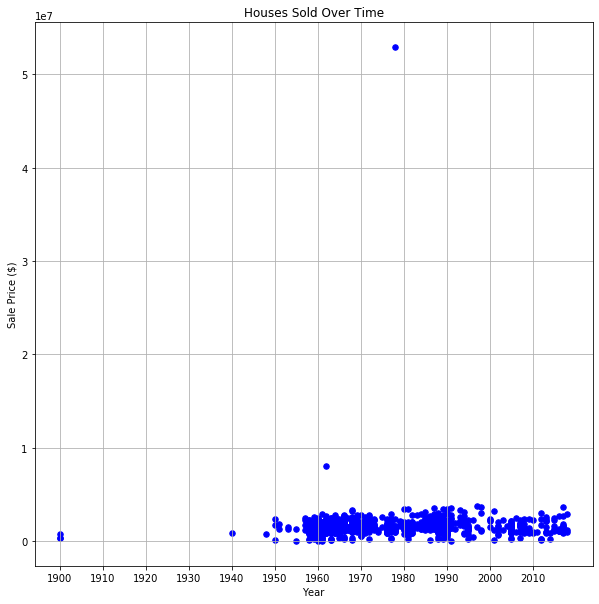

In [15]:
data = cupertino_data_cleaned_df

plt.figure(figsize=(10,10))
plt.scatter(data['BuildingSummaryYearbuilteffective'], data['SaleAmountSaleamt'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(data['BuildingSummaryYearbuilteffective']),max(data['BuildingSummaryYearbuilteffective']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()

# Save the Figure
# plt.savefig("Images/TumorResponseToTreatment")

plt.show()

In [8]:
## Notice how the outlier is skewing the graph  amking rest of the data noisy
    #so the next step is to drop the outliers

In [16]:
cupertino_data_drop_outliers_df = cupertino_data_cleaned_df[cupertino_data_cleaned_df['SaleAmountSaleamt'] < 5000000]
cupertino_data_drop_outliers_df = cupertino_data_drop_outliers_df[cupertino_data_drop_outliers_df['BuildingSummaryYearbuilteffective'] \
                                                            > 1940]


cupertino_data_drop_outliers_df

,BuildingSummaryYearbuilteffective,SaleAmountSaleamt
33,1950,132500
36,1948,750000
53,2001,158000
54,1965,350000
64,1983,2789000
65,2004,1600000
68,1992,1925000
70,1986,2700000
72,1992,1325000
77,1973,1325000


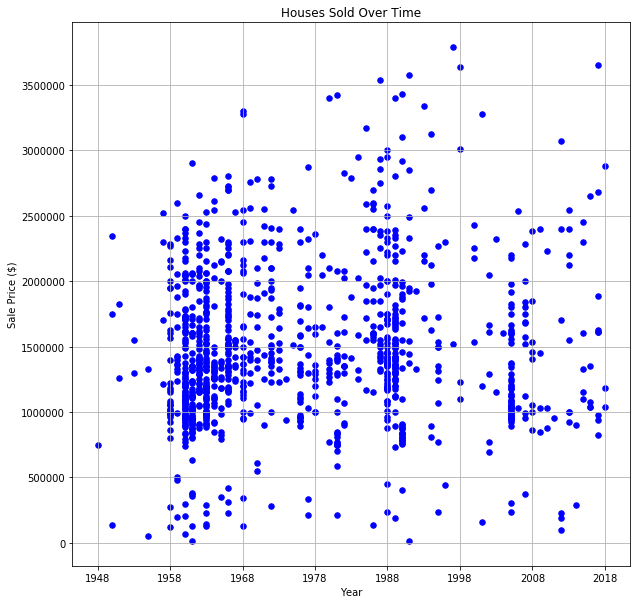

In [17]:
data = cupertino_data_drop_outliers_df


plt.figure(figsize=(10,10))
plt.scatter(data['BuildingSummaryYearbuilteffective'], data['SaleAmountSaleamt'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(data['BuildingSummaryYearbuilteffective']),max(data['BuildingSummaryYearbuilteffective']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()

# Save the Figure
# plt.savefig("Images/TumorResponseToTreatment")

plt.show()

In [23]:
# get the mean value and plot the scatter by year

mean_cupertino_data = cupertino_data_drop_outliers_df.groupby(["BuildingSummaryYearbuilteffective"]).mean()

# Convert to DataFrame
mean_cupertino_df = mean_cupertino_data.reset_index()

# Preview DataFrame
mean_cupertino_df.head()

,BuildingSummaryYearbuilteffective,SaleAmountSaleamt
0,1948,7.500000e+05
1,1950,1.409167e+06
2,1951,1.542500e+06
3,1953,1.425050e+06
4,1955,6.880000e+05


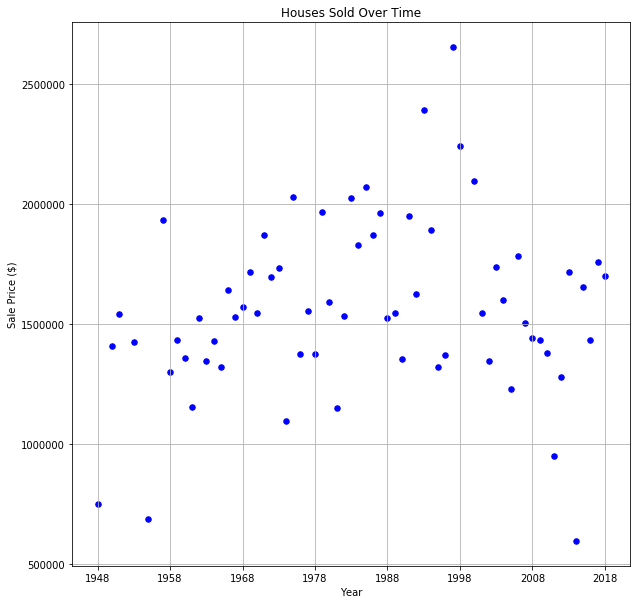

In [24]:
data = mean_cupertino_df


plt.figure(figsize=(10,10))
plt.scatter(data['BuildingSummaryYearbuilteffective'], data['SaleAmountSaleamt'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(data['BuildingSummaryYearbuilteffective']),max(data['BuildingSummaryYearbuilteffective']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()

# Save the Figure
# plt.savefig("Images/TumorResponseToTreatment")

plt.show()